# 📝 Exercise M2.01

The aim of this exercise is to make the following experiments:

* train and test a support vector machine classifier through cross-validation;
* study the effect of the parameter gamma of this classifier using a
  validation curve;
* use a learning curve to determine the usefulness of adding new samples in
  the dataset when building a classifier.

To make these experiments we will first load the blood transfusion dataset.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

We will use a support vector machine classifier (SVM). In its most simple
form, a SVM classifier is a linear classifier behaving similarly to a logistic
regression. Indeed, the optimization used to find the optimal weights of the
linear model are different but we don't need to know these details for the
exercise.

Also, this classifier can become more flexible/expressive by using a so-called
kernel that makes the model become non-linear. Again, no requirement regarding
the mathematics is required to accomplish this exercise.

We will use an RBF kernel where a parameter `gamma` allows to tune the
flexibility of the model.

First let's create a predictive pipeline made of:

* a [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
  with default parameter;
* a [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
  where the parameter `kernel` could be set to `"rbf"`. Note that this is the
  default.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
dtypes: int64(4)
memory usage: 23.5 KB


In [5]:
SVC?

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

In [4]:
# Write your code here.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

preprocessor = StandardScaler()

model = make_pipeline(preprocessor, SVC())

Evaluate the generalization performance of your model by cross-validation with
a `ShuffleSplit` scheme. Thus, you can use
[`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
and pass a
[`sklearn.model_selection.ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)
to the `cv` parameter. Only fix the `random_state=0` in the `ShuffleSplit` and
let the other parameters to the default.

In [40]:
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(random_state=0)

cv_results = cross_validate(
    model, data, target,
    cv=cv, return_train_score=True,
)
cv_results = pd.DataFrame(cv_results)

In [41]:
print(
    f"Accuracy score of our model:\n"
    f"{cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f}"
)

Accuracy score of our model:
0.765 ± 0.043


In [14]:
scores = pd.DataFrame()
scores[["train_error", 'test_error']] = -cv_results[['train_score','test_score']]

As previously mentioned, the parameter `gamma` is one of the parameters
controlling under/over-fitting in support vector machine with an RBF kernel.

Evaluate the effect of the parameter `gamma` by using the
[`sklearn.model_selection.validation_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html)
function. You can leave the default `scoring=None` which is equivalent to
`scoring="accuracy"` for classification problems. You can vary `gamma` between
`10e-3` and `10e2` by generating samples on a logarithmic scale with the help
of `np.logspace(-3, 2, num=30)`.

Since we are manipulating a `Pipeline` the parameter name will be set to
`svc__gamma` instead of only `gamma`. You can retrieve the parameter name
using `model.get_params().keys()`. We will go more into detail regarding
accessing and setting hyperparameter in the next section.

In [17]:
validation_curve?

Signature:
validation_curve(
    estimator,
    X,
    y,
    *,
    param_name,
    param_range,
    groups=None,
    cv=None,
    scoring=None,
    n_jobs=None,
    pre_dispatch='all',
    verbose=0,
    error_score=nan,
    fit_params=None,
)
Docstring:
Validation curve.

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified
parameter. This is similar to grid search with one parameter. However, this
will also compute training scores and is merely a utility for plotting the
results.

Read more in the :ref:`User Guide <validation_curve>`.

Parameters
----------
estimator : object type that implements the "fit" and "predict" methods
    An object of that type which is cloned for each validation.

X : array-like of shape (n_samples, n_features)
    Training vector, where `n_samples` is the number of samples and
    `n_features` is the number of features.

y : array-like of shape (n_samples,) or (n_samples, 

In [20]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [26]:
gamma

array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02])

In [38]:
import numpy as np
from sklearn.model_selection import validation_curve

gamma = np.logspace(-3,2, num=30)

train_scores, test_scores = validation_curve(
    model, data, target, param_name='svc__gamma', param_range=gamma,
    cv=cv,
)
train_errors, test_errors = -train_scores, -test_scores

Plot the validation curve for the train and test scores.

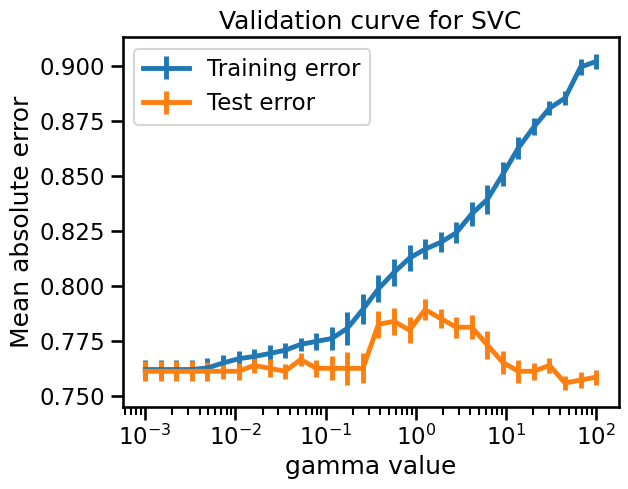

In [42]:
import matplotlib.pyplot as plt

plt.errorbar(gamma, train_scores.mean(axis=1), yerr=train_errors.std(axis=1),
             label="Training error")
plt.errorbar(gamma, test_scores.mean(axis=1), yerr=train_errors.std(axis=1),
             label="Test error")
plt.legend()

plt.xscale("log")
plt.xlabel("gamma value")
plt.ylabel("Mean absolute error")

_ = plt.title("Validation curve for SVC")

Now, you can perform an analysis to check whether adding new samples to the
dataset could help our model to better generalize. Compute the learning curve
(using [`sklearn.model_selection.learning_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html))
by computing the train and test scores for different training dataset size.
Plot the train and test scores with respect to the number of samples.

In [47]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1.0, num=10, endpoint=True)

results = learning_curve(
    model, data, target, train_sizes=train_sizes, cv=cv
)

train_size, train_scores, test_scores = results[:3]

train_errors, test_errors, = -train_scores, -test_scores

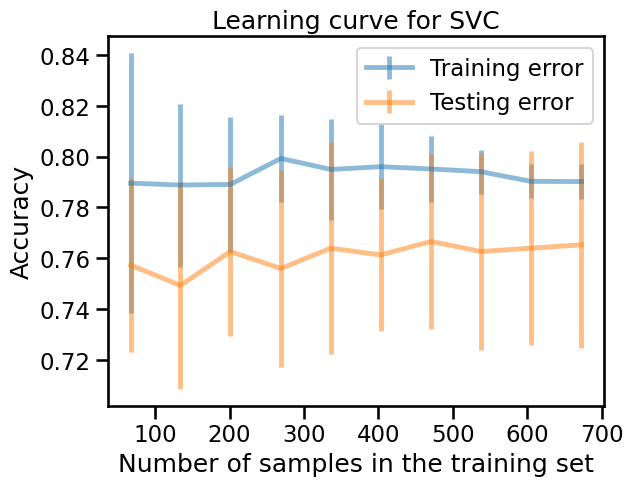

In [50]:
import matplotlib.pyplot as plt

plt.errorbar(train_size, train_scores.mean(axis=1),
             yerr=train_errors.std(axis=1), alpha=0.5, label="Training error")
plt.errorbar(train_size, test_scores.mean(axis=1),
             yerr=test_errors.std(axis=1), alpha=0.5, label="Testing error")
plt.legend()

plt.xlabel("Number of samples in the training set")
plt.ylabel("Accuracy")
_ = plt.title("Learning curve for SVC")